# Exploratory Data Analysis
This notebook is dedicated to exploring the data that we scraped and saved into a csv file.

Let's start of by importing the libraries and reading in the data into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set_style('darkgrid')

Read the .csv data into a pandas dataframe

In [16]:
df = pd.read_csv('pokemon.csv')
df.head()

,number,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,img_link
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,https://img.pokemondb.net/sprites/sword-shield...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,https://img.pokemondb.net/sprites/sword-shield...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,https://img.pokemondb.net/sprites/sword-shield...
3,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,https://img.pokemondb.net/sprites/sword-shield...
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,https://img.pokemondb.net/sprites/sword-shield...


## Let's look at some basic descriptions of our data

In [3]:
df.describe()

,number,total,hp,attack,defense,sp_atk,sp_def,speed
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,492.746231,441.206868,70.887772,80.948911,74.587102,72.876884,72.128141,69.778057
std,293.719541,121.015326,26.859651,32.122250,30.678626,32.696051,27.628468,30.195593
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,235.250000,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000
50%,486.500000,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,741.750000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000
max,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    1194 non-null   int64 
 1   name      1194 non-null   object
 2   type_1    1194 non-null   object
 3   type_2    652 non-null    object
 4   total     1194 non-null   int64 
 5   hp        1194 non-null   int64 
 6   attack    1194 non-null   int64 
 7   defense   1194 non-null   int64 
 8   sp_atk    1194 non-null   int64 
 9   sp_def    1194 non-null   int64 
 10  speed     1194 non-null   int64 
 11  img_link  1194 non-null   object
dtypes: int64(8), object(4)
memory usage: 112.1+ KB


In [10]:
df.isnull().sum()

number        0
name          0
type_1        0
type_2      542
total         0
hp            0
attack        0
defense       0
sp_atk        0
sp_def        0
speed         0
img_link      0
dtype: int64

In [12]:
df.dtypes

number       int64
name        object
type_1      object
type_2      object
total        int64
hp           int64
attack       int64
defense      int64
sp_atk       int64
sp_def       int64
speed        int64
img_link    object
dtype: object

How many unique Pokémon names and numbers do we have?

In [67]:
print(f"Number of unique Pokémon names: \t {df.name.nunique()}")
print(f"Number of unique Pokémon numbers:\t {df.number.nunique()}")

Number of unique Pokémon names: 	 1194
Number of unique Pokémon numbers:	 1010


Here we can see the effect of e.g. Mega Pokémon having the same Pokémon number as the original version of the Pokémon. 

## Let's dive into some visuals to get a feel for the data!

Let's first define a color dictionary to map the Pokémon type to a nice color.
<br>
We'll also add some font changes to the labels and axes-ticks.

In [5]:
# Make a color dictionary for the different pokemon types
color_dict = {
    'Grass': '#78C850',
    'Fire': '#F08030',
    'Water': '#6890F0',
    'Bug': '#A8B820',
    'Normal': '#A8A878',
    'Poison': '#A040A0',
    'Electric': '#F8D030',
    'Ground': '#E0C068',
    'Fairy': '#EE99AC',
    'Fighting': '#C03028',
    'Psychic': '#F85888',
    'Rock': '#B8A038',
    'Ghost': '#705898',
    'Ice': '#98D8D8',
    'Dragon': '#7038F8',
    'Dark': '#705848',
    'Steel': '#B8B8D0',
    'Flying': '#A890F0'
}

# Make a font dictionary for the x and y labels
label_font_dict = {
    'family': 'serif',
    'color': 'darkblue',
    'weight': 'bold',
    'size': 20
}

# Make a font dictionary for the ticks
tick_font_dict = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 14
}

/var/folders/pn/h0v_s94x231gxb7bq6h6wtpm0000gn/T/ipykernel_18290/4297453.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=tick_font_dict)


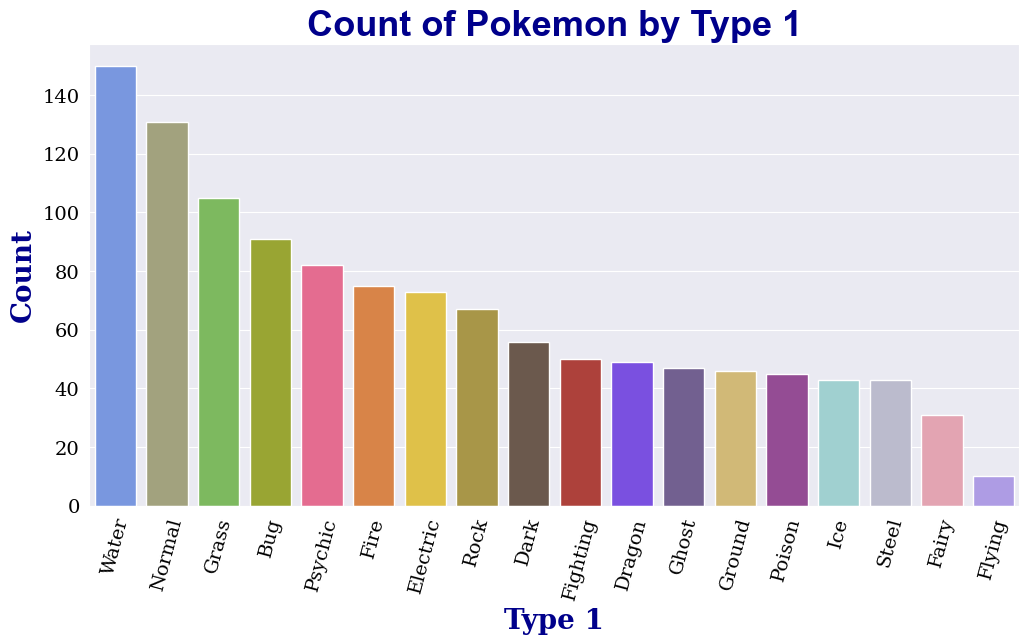

In [101]:
# Plot the count of Pokemon by Type 1
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='type_1', palette=color_dict, order=df['type_1'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontdict=tick_font_dict)
ax.set_yticklabels(ax.get_yticklabels(), fontdict=tick_font_dict)
ax.set_xlabel("Type 1", fontdict=label_font_dict)
ax.set_ylabel("Count", fontdict=label_font_dict)
ax.set_title("Count of Pokemon by Type 1", fontdict={'fontsize': 26, 'fontweight': 'bold', 'color': 'darkblue'})
fig.savefig('images/count_of_pokemon_by_type_1.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

/var/folders/pn/h0v_s94x231gxb7bq6h6wtpm0000gn/T/ipykernel_18290/1825700092.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=tick_font_dict)


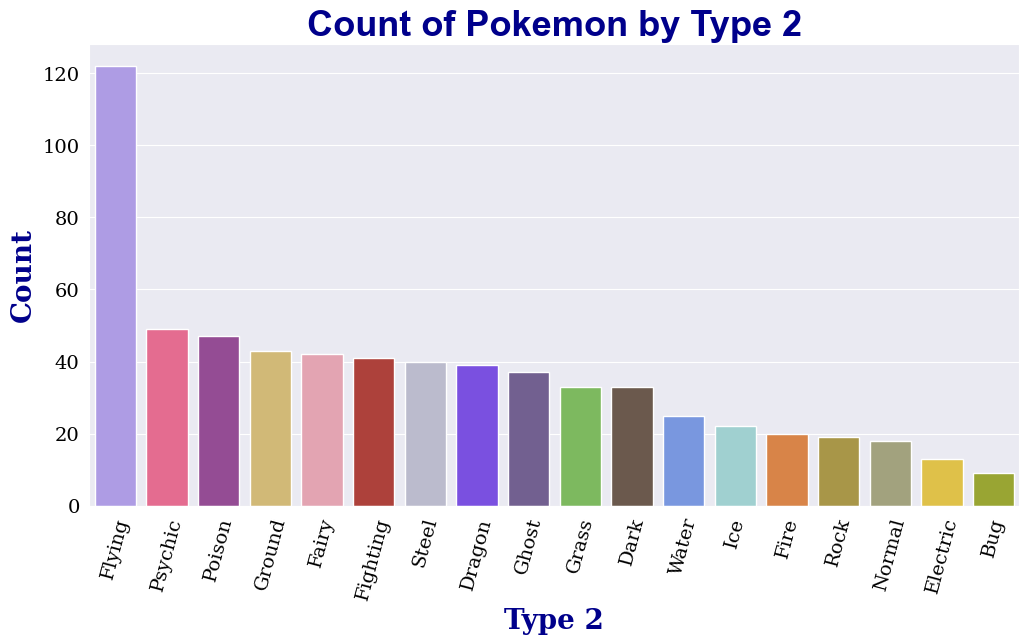

In [102]:
# Plot the count of Pokemon by Type 2
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='type_2', palette=color_dict, order=df['type_2'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontdict=tick_font_dict)
ax.set_yticklabels(ax.get_yticklabels(), fontdict=tick_font_dict)
ax.set_xlabel("Type 2", fontdict=label_font_dict)
ax.set_ylabel("Count", fontdict=label_font_dict)
ax.set_title("Count of Pokemon by Type 2", fontdict={'fontsize': 26, 'fontweight': 'bold', 'color': 'darkblue'})
fig.savefig('images/count_of_pokemon_by_type_2.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()

In [128]:
df["type_1"].value_counts().index

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric',
       'Rock', 'Dark', 'Fighting', 'Dragon', 'Ghost', 'Ground', 'Poison',
       'Ice', 'Steel', 'Fairy', 'Flying'],
      dtype='object', name='type_1')

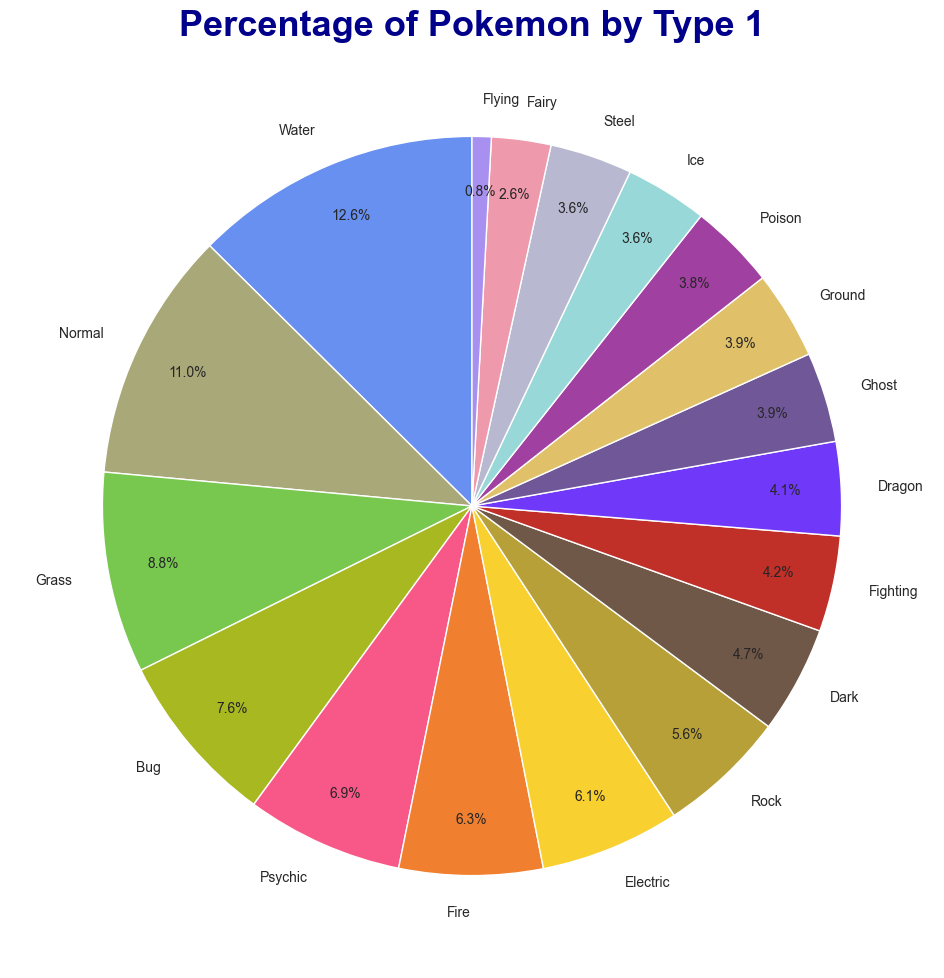

In [135]:
# Plot the percentage of Pokemon by Type 1
plt.figure(figsize=(12, 12))
plt.pie(df['type_1'].value_counts(), labels=df['type_1'].value_counts().index, colors=[color_dict[t] for t in df["type_1"].value_counts().index], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title("Percentage of Pokemon by Type 1", fontdict={'fontsize': 26, 'fontweight': 'bold', 'color': 'darkblue'})
plt.savefig('images/percentage_of_pokemon_by_type_1.png', dpi=300, bbox_inches='tight')
plt.show()

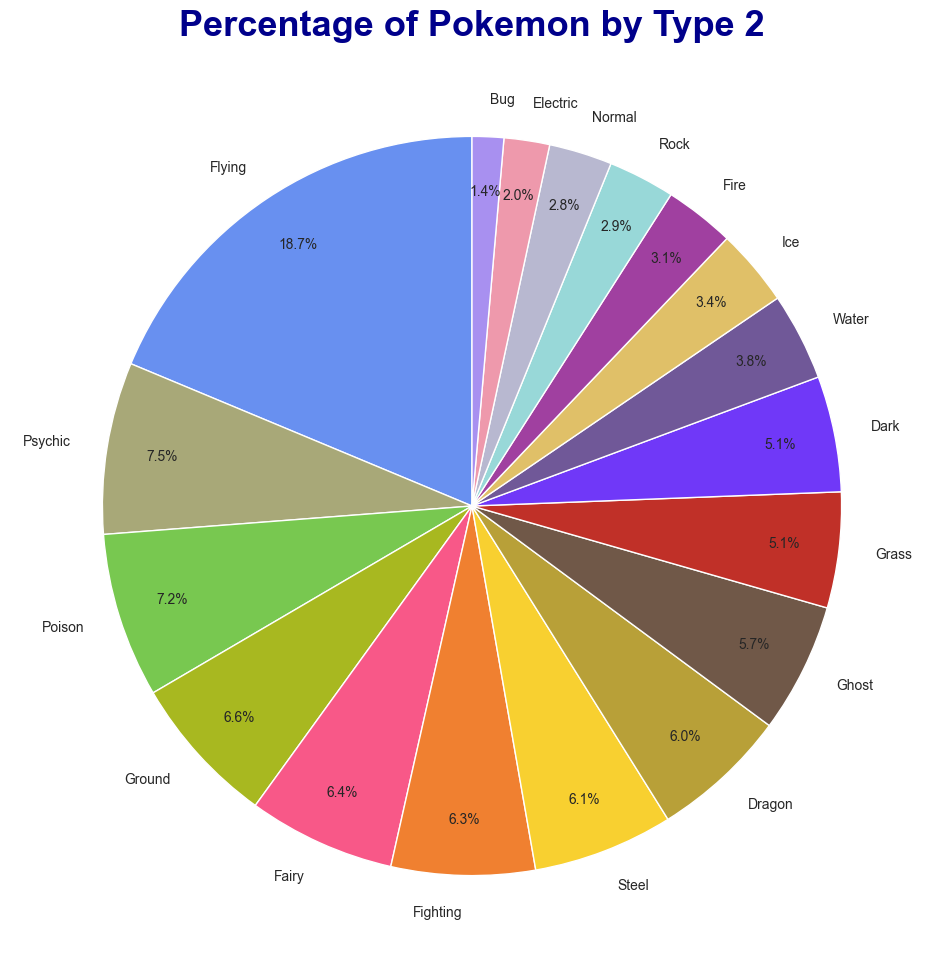

In [137]:
# Plot the percentage of Pokemon by Type 2
plt.figure(figsize=(12, 12))
plt.pie(df['type_2'].value_counts(), labels=df['type_2'].value_counts().index, colors=[color_dict[t] for t in df["type_1"].value_counts().index], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title("Percentage of Pokemon by Type 2", fontdict={'fontsize': 26, 'fontweight': 'bold', 'color': 'darkblue'})
plt.savefig('images/percentage_of_pokemon_by_type_2.png', dpi=300, bbox_inches='tight')
plt.show()

## Let's look closer at the HP (health point) column of the dataframe

In [11]:
print(df.hp.describe())
print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")
print(df.hp.info())

count    1194.000000
mean       70.887772
std        26.859651
min         1.000000
25%        52.000000
50%        70.000000
75%        85.000000
max       255.000000
Name: hp, dtype: float64
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
<class 'pandas.core.series.Series'>
RangeIndex: 1194 entries, 0 to 1193
Series name: hp
Non-Null Count  Dtype
--------------  -----
1194 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB
None


### Which Pokémon has the smallest/largest amount of HP?
We can find out by only looking at the rows in the dataframe where the HP column has the value 1 or 255 (or less hard-coded - `df.hp.min()` and `df.hp.max()`).

In [52]:
df_hp_extremes = df.loc[(df.hp == df.hp.min()) | (df.hp == df.hp.max())]
df_hp_extremes

,number,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,img_link
305,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,https://img.pokemondb.net/sprites/sword-shield...
362,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,https://img.pokemondb.net/sprites/sword-shield...
1058,890,Eternatus Eternamax,Poison,Dragon,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...


* It seems like we have two winners when it comes to most HP - *Blissey* and *Eternatus Eternamax*!

* *Shedinja* takes the spot for lowest amount of HP.

### Let's see if we can extract the images of the Pokémon from the links

In [53]:
urls = df_hp_extremes['img_link'].tolist()
urls

['https://img.pokemondb.net/sprites/sword-shield/icon/blissey.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/shedinja.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/eternatus-eternamax.png']

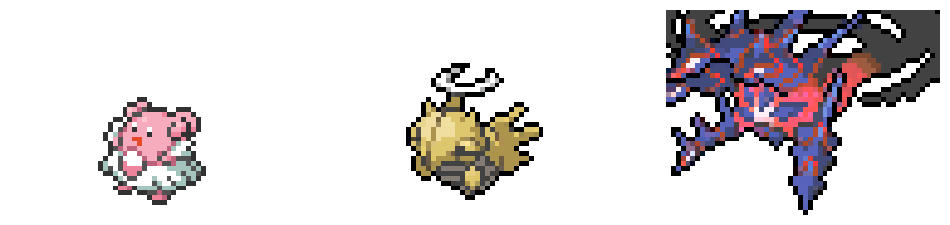

In [56]:
import requests
from io import BytesIO
from PIL import Image

# URLs of the images found in the dataframe
urls = df_hp_extremes['img_link'].tolist()

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

for url in urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    ax[urls.index(url)].imshow(img)
    ax[urls.index(url)].axis('off')

plt.show()

fig.savefig("images/least_most_hp.png", dpi=300, bbox_inches="tight")

Let's try to visualize how different Pokémon (type 1) are grouped when it comes to their attack and defense stats

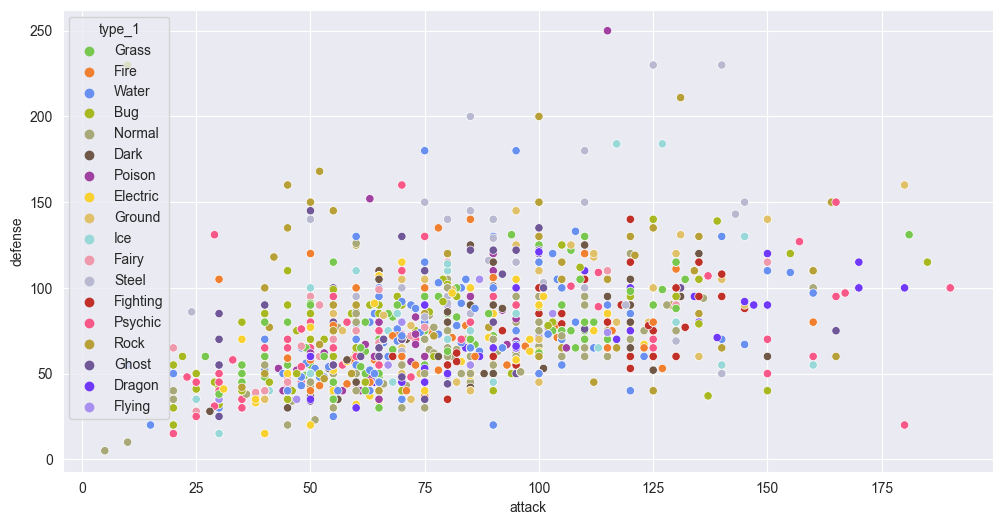

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df, x='attack', y='defense', hue='type_1', palette=color_dict, ax=ax)
plt.show()

Wow! That was a lot of information ... There also seems to be some vertical patterns going on ... 
<br>
Let's restrict the number of types that we're looking at

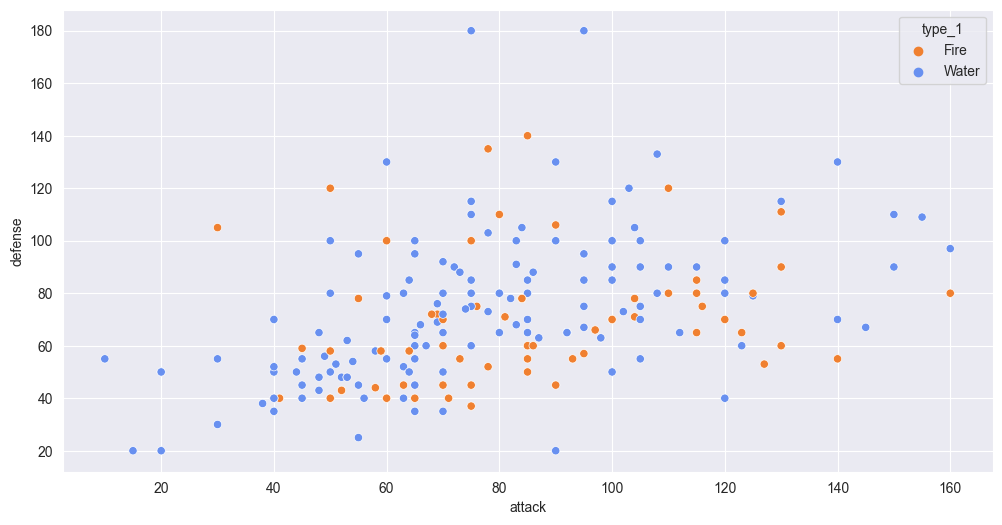

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df.loc[df.type_1.isin(["Water", "Fire"])], x='attack', y='defense', hue='type_1', palette=color_dict, ax=ax)
plt.show()

Just by looking at the above, it seems like Pokémon having type_1 = Water have higher defense than Pokémon having type_1 = Fire. Let's test this hypothesis using a t-test.

In [13]:
# t-test to test the difference in means between the attack of Water and Fire Pokemon
from scipy.stats import ttest_ind

water_attack = df.loc[df.type_1 == "Water", "attack"]
fire_attack = df.loc[df.type_1 == "Fire", "attack"]

ttest_ind(water_attack, fire_attack)




Ttest_indResult(statistic=-1.7672207701110425, pvalue=0.07855900044331374)